<a href="https://colab.research.google.com/github/ShubhamKNIT/learn-python/blob/main/notebooks/02_nn_classification_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Introduction to NN classification with TF

Classification problems:
- Binary Classification
- Multiclass Classification
- Multilabel Classification


## Generate Dataset

In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=7)

In [2]:
X

array([[-0.75681927, -0.27401115],
       [-0.48167671, -0.87409407],
       [-0.97024009, -0.25205207],
       ...,
       [ 0.744733  ,  0.33484256],
       [-0.78247498,  0.65396415],
       [-0.62324593,  0.84347736]])

In [3]:
y[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

### Let's try visualizing our data

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0" : X[:, 0], "X1" : X[:, 1], "y" : y});
circles

,X0,X1,y
0,-0.756819,-0.274011,1
1,-0.481677,-0.874094,0
2,-0.970240,-0.252052,0
3,-0.660944,-0.499074,1
4,-0.907931,0.408418,0
...,...,...,...
995,0.405450,0.694459,1
996,0.834156,-0.009121,1
997,0.744733,0.334843,1
998,-0.782475,0.653964,0


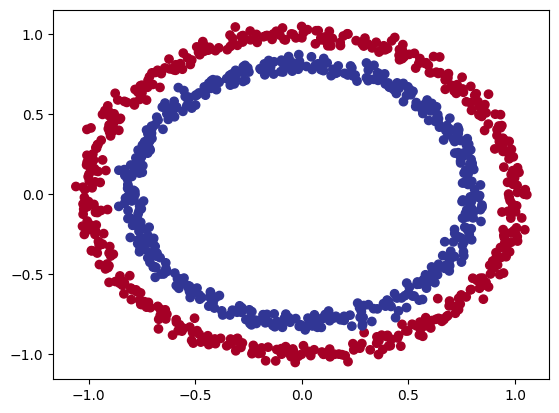

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [7]:
 X[:10], y[:10]

(array([[-0.75681927, -0.27401115],
        [-0.48167671, -0.87409407],
        [-0.97024009, -0.25205207],
        [-0.66094436, -0.49907384],
        [-0.90793058,  0.40841756],
        [ 0.41509873, -0.94636248],
        [-0.57674439, -0.58806687],
        [ 0.3842643 ,  0.9266862 ],
        [ 0.98037309, -0.14955743],
        [-0.56027967,  0.78041243]]),
 array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0]))

## Modelling

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [8]:
import tensorflow as tf

In [32]:
tf.random.set_seed(7)

# Define the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6924 - accuracy: 0.5013
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5063
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5113
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5200
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5113
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5175
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5200
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5188
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5163
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5225
Epoch 11/

In [33]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.9750


[0.5890856385231018, 0.9750000238418579]

In [34]:
y_preds_1 = model_1.predict(X_test)

7/7 [==============================] - 0s 2ms/step


## Visulizing Predictions

Let's create function `plot_decision_boundary()`:
- Take in a trained model, features(X), and labels(y)
- Create a meshgrid of the different X values
- Make predictions across the meshgrid
- Plot the predictions as well as a line between zones


In [39]:
import numpy as np

In [43]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X
    """

    # define the axis boundaries of the plot and create a meshgrid
    x0_min, x0_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x1_min, x1_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max, 100),
                           np.linspace(x1_min, x1_max, 100))


    # ravel() is used to squeeze the 2d arrays into 1d array
    # np.c_ is stack arrays horizontally
    x_in = np.c_[xx0.ravel(), xx1.ravel()]

    # make predictions
    y_pred = model.predict(x_in)

    # check for multi-class
    if (len(y_pred[0]) > 1):
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx0.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx0.shape)

    plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx0.min(), xx0.max())
    plt.ylim(xx1.min(), xx1.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


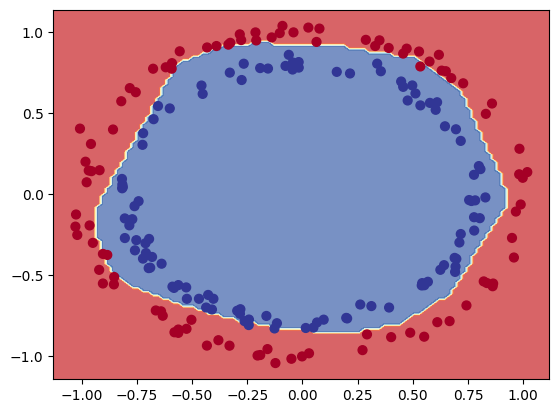

In [44]:
plot_decision_boundary(model_1,
                       X_test,
                       y_test)

In [42]:
x0_min, x0_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
x1_min, x1_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x0_min, x0_max, 100),
                     np.linspace(x1_min, x1_max, 100))
xx, yy

(array([[-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479],
        [-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479],
        [-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479],
        ...,
        [-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479],
        [-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479],
        [-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479]]),
 array([[-1.15174787, -1.15174787, -1.15174787, ..., -1.15174787,
         -1.15174787, -1.15174787],
        [-1.12852468, -1.12852468, -1.12852468, ..., -1.12852468,
         -1.12852468, -1.12852468],
        [-1.10530149, -1.10530149, -1.10530149, ..., -1.10530149,
         -1.10530149, -1.10530149],
        ...,
        [ 1.10090179,  1.10090179,  1.10090179, ...,  